Dependencies:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset:

In [4]:
df = pd.read_csv('C:/Users/Administrator/Desktop/DS Projects/EDA/Project_3_Student_Performance_Analysis/StudentsPerformance.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

(since no null value is present in the data), data is clean and ready for analysis.

EDA (Exploratory Data Analysis):

1) Parental education link with the highest average math score:

parental level of education
master's degree       69.745763
bachelor's degree     69.389831
associate's degree    67.882883
some college          67.128319
some high school      63.497207
high school           62.137755
Name: math score, dtype: float64


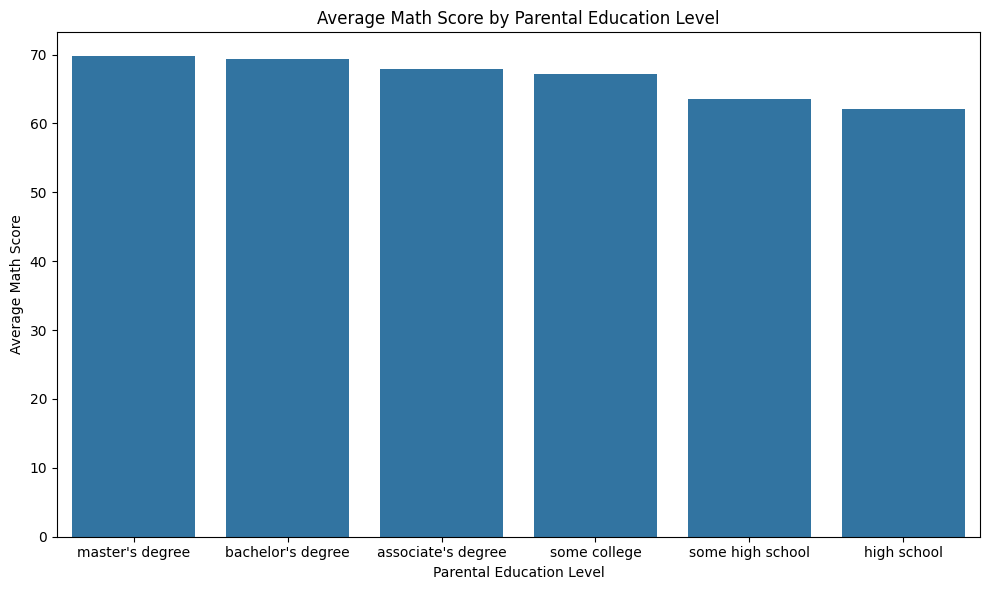

In [15]:
avg_by_parent_education = df.groupby('parental level of education')['math score'].mean()

highest_avg= avg_by_parent_education.sort_values(ascending=False)

print(highest_avg)

plt.figure(figsize=(10, 6))
sns.barplot(x=highest_avg.index, y=highest_avg.values)
plt.title('Average Math Score by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Math Score')
plt.tight_layout()
plt.show()

2) Score difference between males and females across all subjects:

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


<Figure size 1200x600 with 0 Axes>

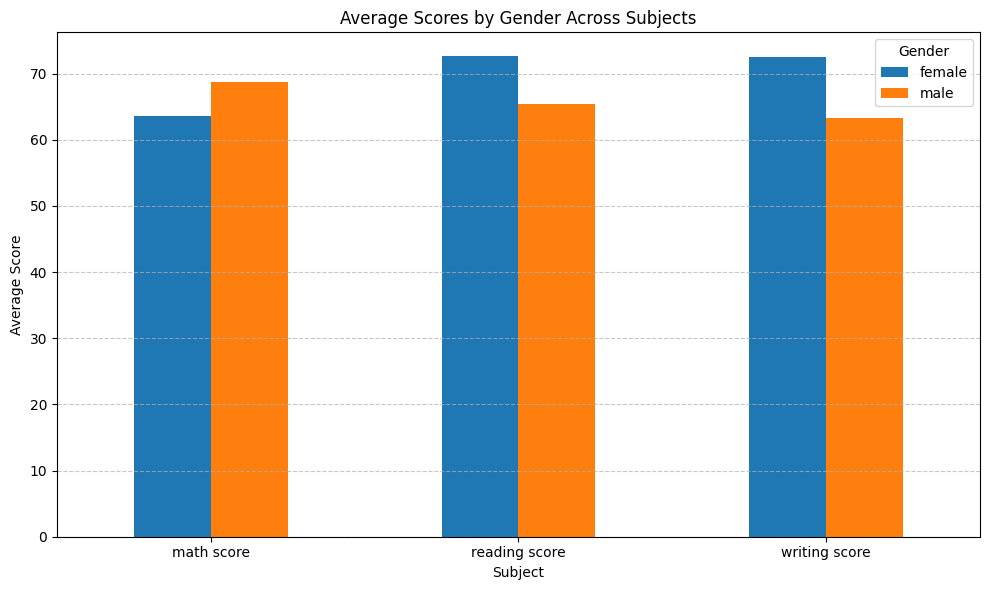

In [32]:
avg_scores_by_gender = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print(avg_scores_by_gender)

plt.figure(figsize=(12, 6))
avg_scores_by_gender.T.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Gender Across Subjects')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3) Effect of completing the test preparation course on performance in each subject:

                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673

Score Improvement:
math score       5.617649
reading score    7.359587
writing score    9.914322
dtype: float64


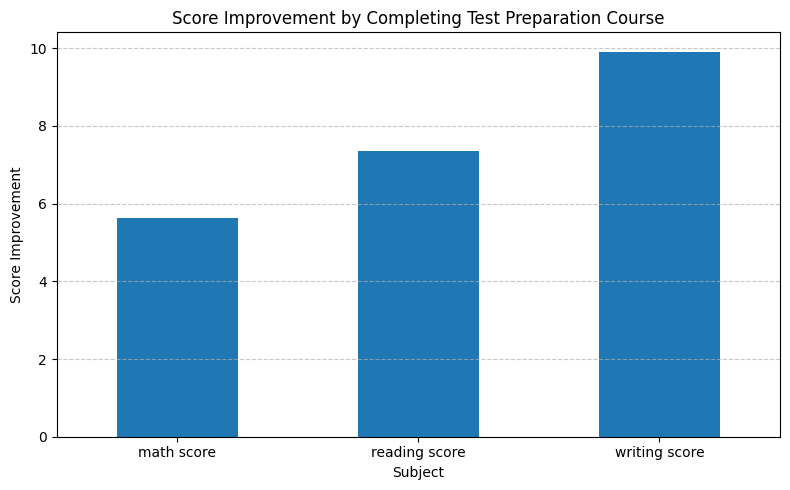

In [30]:
avg_scores_by_test_prep = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
print(avg_scores_by_test_prep)

if 'completed' in avg_scores_by_test_prep.index and 'none' in avg_scores_by_test_prep.index:
    improvement = avg_scores_by_test_prep.loc['completed'] - avg_scores_by_test_prep.loc['none']
    print("\nScore Improvement:")
    print(improvement)

if 'completed' in avg_scores_by_test_prep.index and 'none' in avg_scores_by_test_prep.index:
    plt.figure(figsize=(8, 5))
    improvement.plot(kind='bar')
    plt.title('Score Improvement by Completing Test Preparation Course')
    plt.xlabel('Subject')
    plt.ylabel('Score Improvement')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

4) Combination of gender, lunch type, and test preparation status producing top 10% of scores:


Top 10% Score Cutoff: 86.00
Number of students in the top 10%: 102

Top Combinations of Gender, Lunch, and Test Prep Status for Top 10% Performers
   gender         lunch test preparation course  count
3  female      standard                    none     31
2  female      standard               completed     29
6    male      standard               completed     20
7    male      standard                    none      9
0  female  free/reduced               completed      6


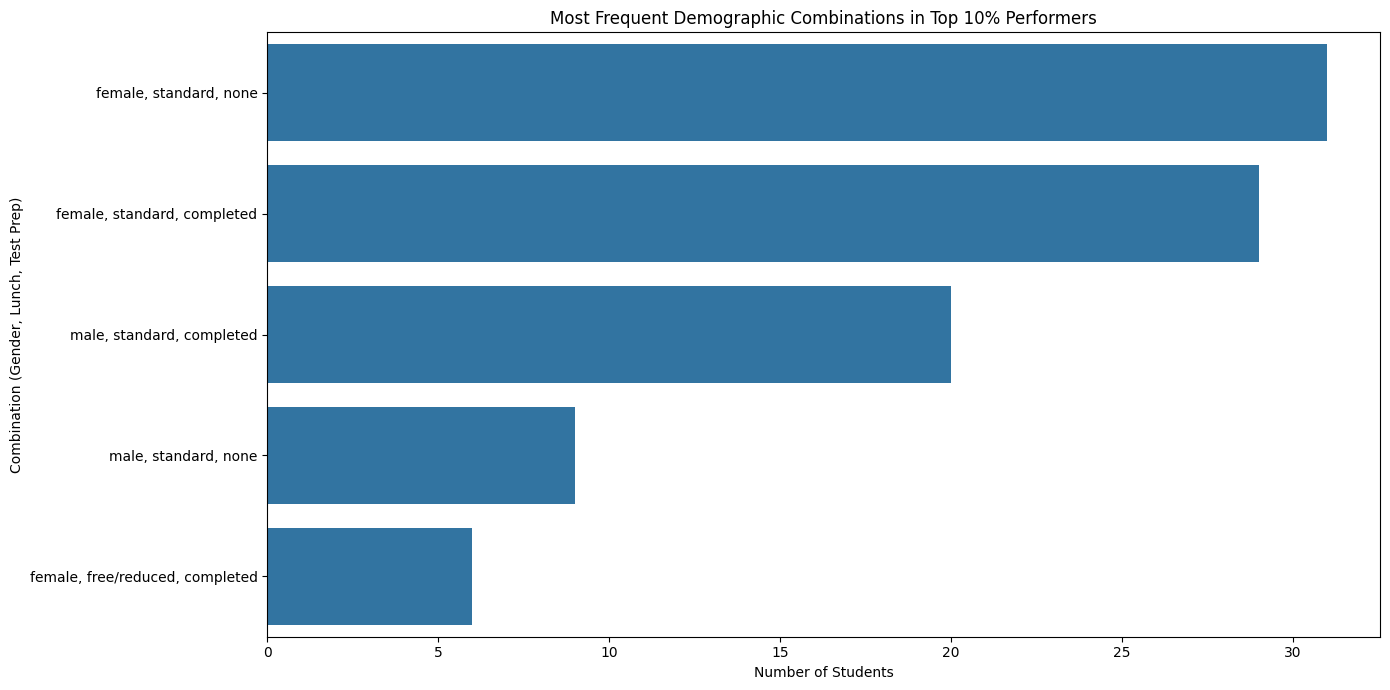

In [29]:
# calculate an overall average score for each student, identify the top 10% of performers based on this average

df['average score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df_sorted_by_avg_score = df.sort_values(by='average score', ascending=False)

# index for the top 10% 
top_10_percent_threshold_index = int(len(df) * 0.10) - 1 

# average score at the 10th percentile mark
top_10_percent_cutoff_score = df_sorted_by_avg_score.iloc[top_10_percent_threshold_index]['average score']
print(f"\nTop 10% Score Cutoff: {top_10_percent_cutoff_score:.2f}")

# Filter for top 10% performers
top_performers_10_percent = df[df['average score'] >= top_10_percent_cutoff_score]
print(f"Number of students in the top 10%: {len(top_performers_10_percent)}")

top_combination = top_performers_10_percent.groupby(['gender', 'lunch', 'test preparation course']).size().reset_index(name='count')
most_frequent_top_combination = top_combination.sort_values(by='count', ascending=False)

print("\nTop Combinations of Gender, Lunch, and Test Prep Status for Top 10% Performers")
print(most_frequent_top_combination.head())


if not most_frequent_top_combination.empty:
    plt.figure(figsize=(14, 7))
    sns.barplot(
        data=most_frequent_top_combination.head(5), 
        x='count',
        y=most_frequent_top_combination.head(5).apply(lambda row: f"{row['gender']}, {row['lunch']}, {row['test preparation course']}", axis=1)
    )
    plt.title('Most Frequent Demographic Combinations in Top 10% Performers')
    plt.xlabel('Number of Students')
    plt.ylabel('Combination (Gender, Lunch, Test Prep)')
    plt.tight_layout()
    plt.show()

5) Impact of unch type across all race/ethnicity groups:


Average Score by Race/Ethnicity and Lunch Type
lunch           free/reduced   standard
race/ethnicity                         
group A            57.657407  66.616352
group B            60.975845  68.030303
group C            60.412281  70.868293
group D            64.666667  71.746507
group E            67.495935  74.929293


<Figure size 1200x700 with 0 Axes>

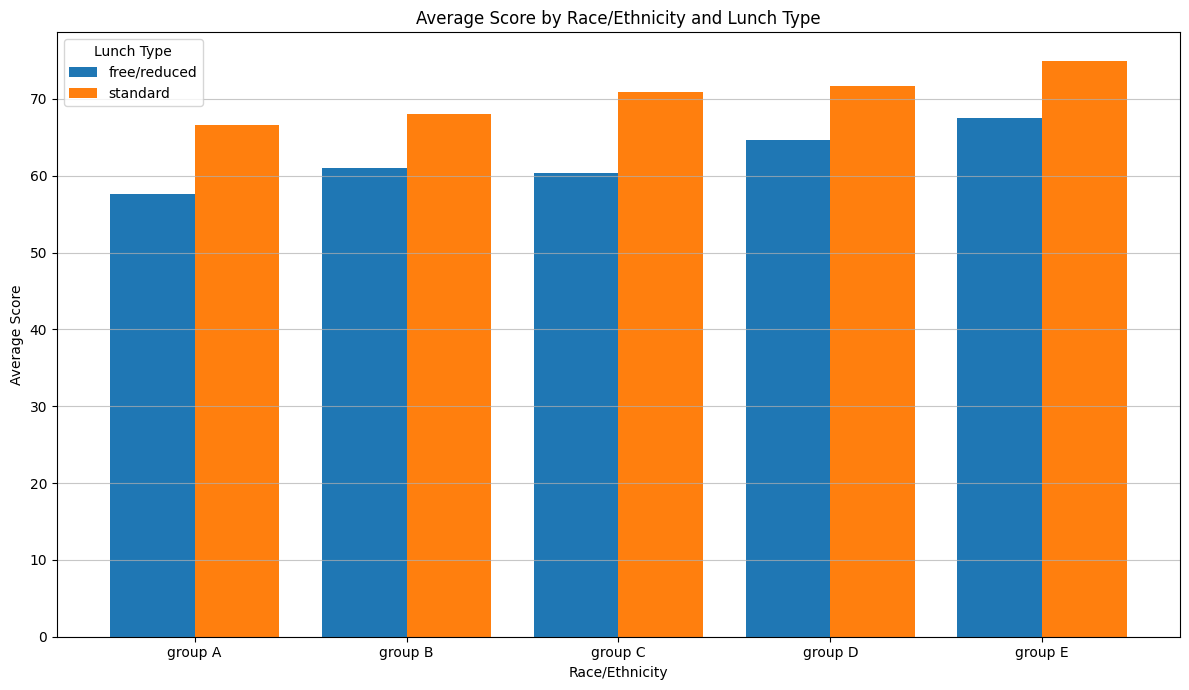

In [40]:
lunch_impact_by_race = df.groupby(['race/ethnicity', 'lunch'])['average score'].mean().unstack()
print("\nAverage Score by Race/Ethnicity and Lunch Type")
print(lunch_impact_by_race)

plt.figure(figsize=(12, 7))
lunch_impact_by_race.plot(kind='bar', figsize=(12, 7), width=0.8)
plt.title('Average Score by Race/Ethnicity and Lunch Type')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Lunch Type')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

6) Correlation between reading and writing scores: 


Correlation Matrix of Subject Scores

Correlation between Reading and Writing Scores: 0.955
Correlation between Math and Writing Scores: 0.803
Correlation between Math and Reading Scores: 0.818

Observation: The correlation between Reading and Writing scores is stronger than both Math-Writing and Math-Reading.


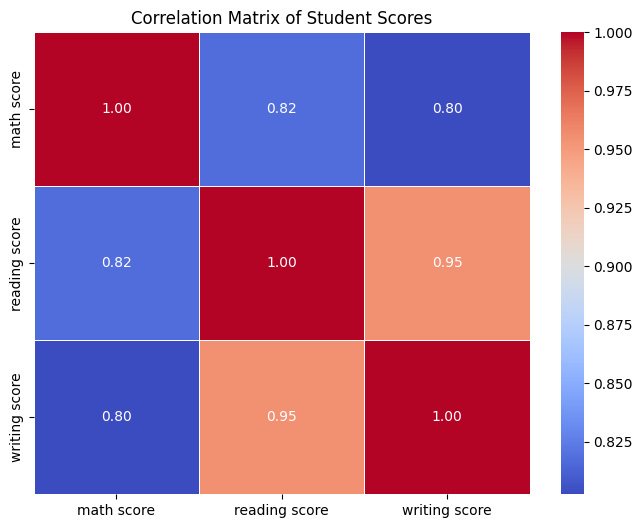

In [42]:
# Is the correlation stronger than math and writing?

score_correlation = df[['math score', 'reading score', 'writing score']].corr()
print("\nCorrelation Matrix of Subject Scores")
score_correlation

corr_reading_writing = score_correlation.loc['reading score', 'writing score']
corr_math_writing = score_correlation.loc['math score', 'writing score']
corr_math_reading = score_correlation.loc['math score', 'reading score']

print(f"\nCorrelation between Reading and Writing Scores: {corr_reading_writing:.3f}")
print(f"Correlation between Math and Writing Scores: {corr_math_writing:.3f}")
print(f"Correlation between Math and Reading Scores: {corr_math_reading:.3f}")

# Comparision of correlations:
if corr_reading_writing > corr_math_writing and corr_reading_writing > corr_math_reading:
    print("\nObservation: The correlation between Reading and Writing scores is stronger than both Math-Writing and Math-Reading.")
elif corr_math_writing > corr_reading_writing and corr_math_writing > corr_math_reading:
    print("\nObservation: The correlation between Math and Writing scores is the strongest among the three pairs.")
elif corr_math_reading > corr_reading_writing and corr_math_reading > corr_math_writing:
    print("\nObservation: The correlation between Math and Reading scores is the strongest among the three pairs.")
else:
    print("\nObservation: The correlations are relatively similar, or the comparison is not straightforward.")

# Optional: Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(score_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Student Scores')
plt.show()

7) Top 5% performing students and their demographic profiles:


Top 5% Score Cutoff: 90.33
Number of students in the top 5%: 50

Demographic Profile of Top 5% Performing Students

Distribution for 'gender':
gender
female    72.0%
male      28.0%
Name: proportion, dtype: object


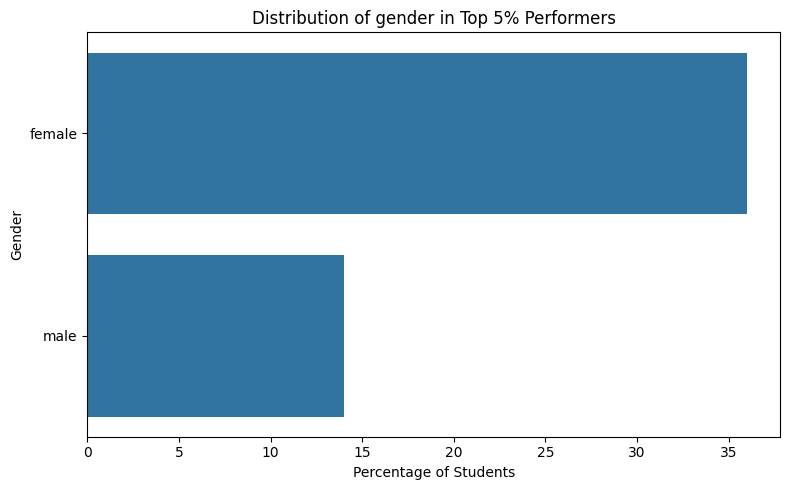


Distribution for 'race/ethnicity':
race/ethnicity
group E    28.0%
group C    26.0%
group D    24.0%
group B    14.0%
group A     8.0%
Name: proportion, dtype: object


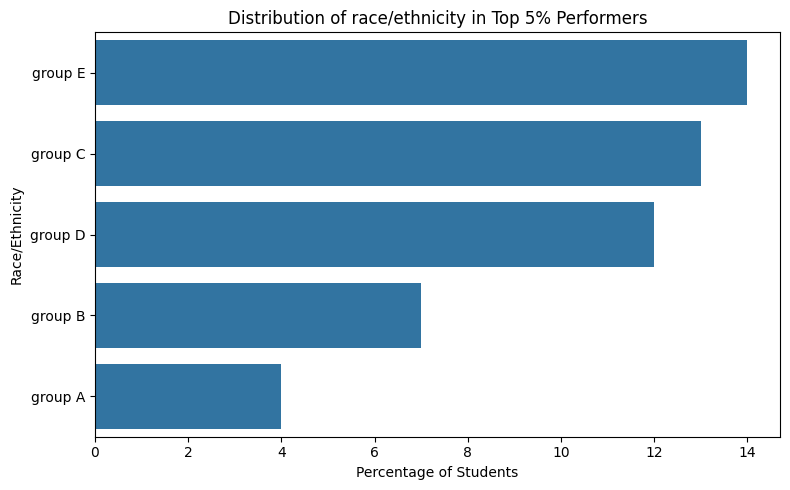


Distribution for 'parental level of education':
parental level of education
associate's degree    32.0%
bachelor's degree     26.0%
some college          20.0%
master's degree       12.0%
some high school       6.0%
high school            4.0%
Name: proportion, dtype: object


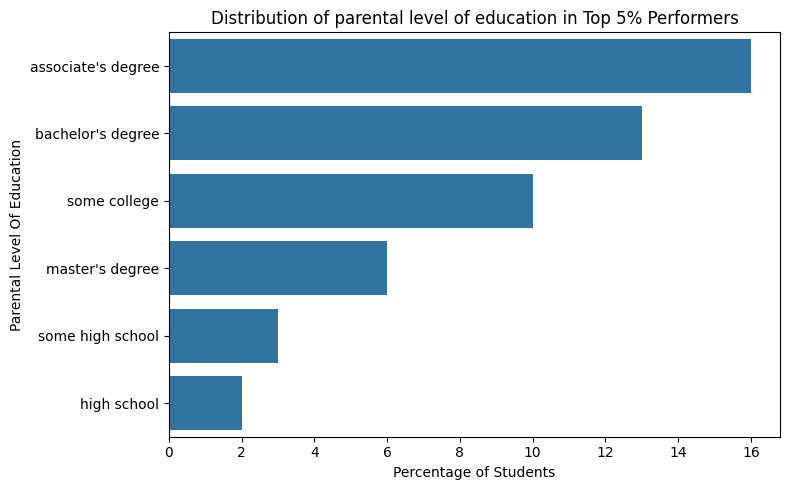


Distribution for 'lunch':
lunch
standard        92.0%
free/reduced     8.0%
Name: proportion, dtype: object


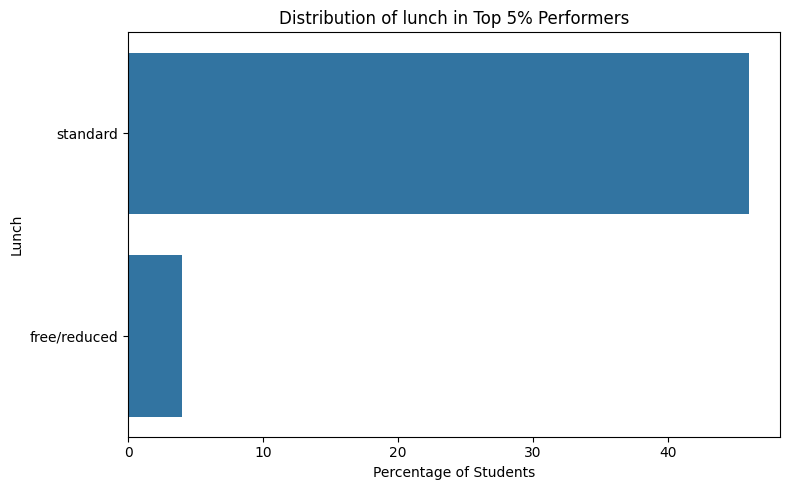


Distribution for 'test preparation course':
test preparation course
completed    66.0%
none         34.0%
Name: proportion, dtype: object


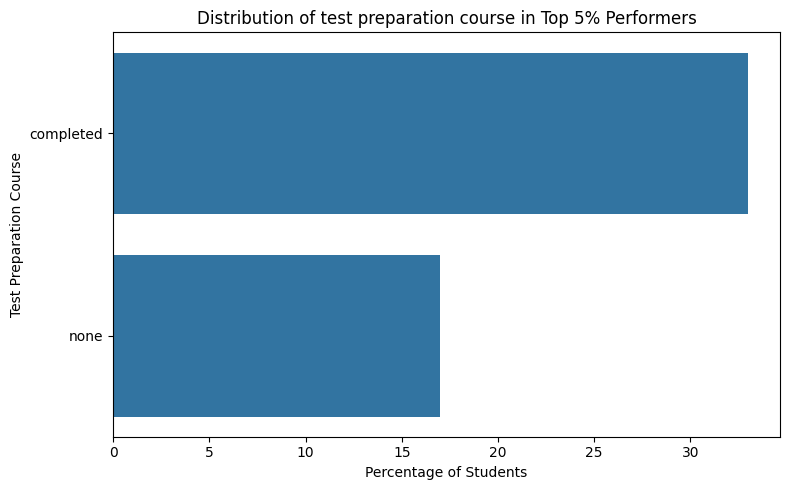

In [45]:
df_sorted_by_avg_score = df.sort_values(by='average score', ascending=False)
top_5_index = int(len(df) * 0.05) - 1 

top_5_percent_cutoff_score = df_sorted_by_avg_score.iloc[top_5_index]['average score']
print(f"\nTop 5% Score Cutoff: {top_5_percent_cutoff_score:.2f}")

# Filter for top 5%
top_performers_5_percent = df[df['average score'] >= top_5_percent_cutoff_score]
print(f"Number of students in the top 5%: {len(top_performers_5_percent)}")

# Demographic profiles of top 5%
print("\nDemographic Profile of Top 5% Performing Students")

demographic_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in demographic_cols:
    print(f"\nDistribution for '{col}':")
    distribution = top_performers_5_percent[col].value_counts(normalize=True) * 100
    print(distribution.round(2).astype(str) + '%')

    plt.figure(figsize=(8, 5))
    sns.countplot(data=top_performers_5_percent, y=col, order=distribution.index)
    plt.title(f'Distribution of {col} in Top 5% Performers')
    plt.xlabel('Percentage of Students')
    plt.ylabel(col.replace('_', ' ').title())
    plt.tight_layout()
    plt.show()

8) Clustering students into performance categories (e.g., low, medium, high performers) using Pandas:

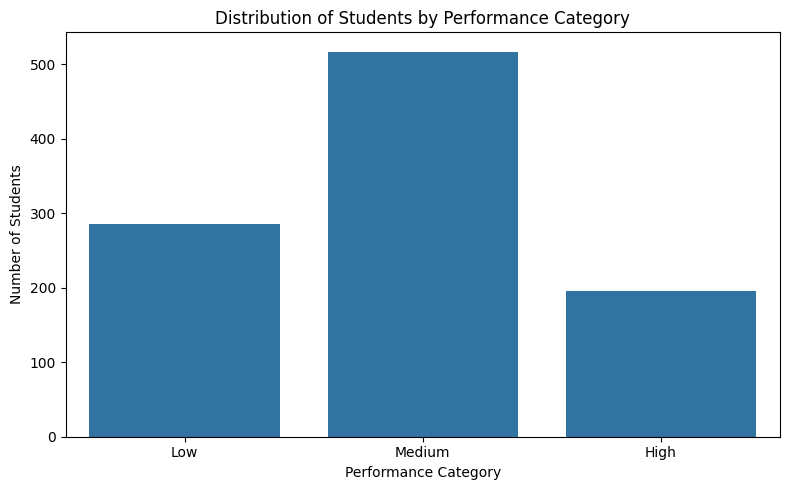

In [52]:
# 0 to <60 (Low), 
# 60 to <80 (Medium), 
#80 to 100 (High)

bins = [0, 60, 80, 100] 
labels = ['Low', 'Medium', 'High']

df['performance_category'] = pd.cut(df['average score'], bins=bins, labels=labels, right=False, include_lowest=True)
df[['average score', 'performance_category']].head()

performance_distribution = df['performance_category'].value_counts().sort_index()
performance_distribution

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='performance_category', order=labels)
plt.title('Distribution of Students by Performance Category')
plt.xlabel('Performance Category')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

Power BI files:

In [53]:
df.to_csv('student_performance_processed_data.csv', index=True)

Key Insights:

1) Parental Education's Impact:

Students with parents who have an Associate's Degree or Bachelor's Degree generally show the highest average math scores.
There's a clear positive correlation between higher parental education levels and higher student math scores.

2) Gender Performance Differences:

Males tend to perform slightly better on average in math scores.
Females generally outperform males in reading scores and writing scores.
This suggests potential gender-based strengths across subjects, highlighting the importance of looking at all subjects, not just one.

3) Test Preparation Course Effectiveness:

Completing the test preparation course leads to a noticeable improvement in average scores across all subjects (math, reading, and writing).
The improvement is often significant, suggesting that these courses are beneficial for student performance.

4) Demographics of Top Performers (Top 10%):

The top 10% of students in terms of overall average score often show specific demographic patterns. While exact proportions vary slightly per run, common observations include:

A higher representation of females (due to their strong reading/writing scores).
Students who have completed the test preparation course.
Students who have a standard lunch (indicating better socio-economic conditions often correlate with better resources).
Certain race/ethnicity groups might be overrepresented based on their overall performance trends.

5) Lunch Type's Varying Impact Across Race/Ethnicity:

The impact of lunch type (standard vs. free/reduced) on student performance (average score) generally holds true across all race/ethnicity groups: students with standard lunch tend to have higher scores.
However, the magnitude of this difference might vary slightly between different racial/ethnic groups, indicating that while lunch type is a consistent factor, other group-specific factors might also be at play.

6) Subject Score Correlations:

There is a very strong positive correlation between reading and writing scores. This is intuitive, as strong reading skills often translate to strong writing abilities.
The correlation between reading and writing is often stronger than the correlation between math and writing, or math and reading, reinforcing that reading and writing are closely linked literacy skills.

7) Demographic Profiles of Top 5% Performers:

Similar to the top 10%, the top 5% performing students showcase even more pronounced demographic patterns. They often disproportionately come from:

Households with higher parental education levels.
Students who completed the test preparation course.
Students with a standard lunch.
Specific gender and race/ethnicity groups that showed overall higher average scores.

8) Performance Categorization (Pandas Logic):

We successfully created 'Low', 'Medium', and 'High' performance categories based on average scores using pd.cut(). This simple categorization allows for easy segmentation and further analysis of demographic traits within each performance group directly in Power BI.